# Credit Risk

In [3]:
# Required library load
library(tidyverse)

In [2]:
# Load the dataset
df <- read.csv("credit_risk_dataset.csv")
glimpse(df)

Rows: 32,581
Columns: 12
$ person_age                 <int> 22, 21, 25, 23, 24, 21, 26, 24, 24, 21, 22,…
$ person_income              <int> 59000, 9600, 9600, 65500, 54400, 9900, 7710…
$ person_home_ownership      <chr> "RENT", "OWN", "MORTGAGE", "RENT", "RENT", …
$ person_emp_length          <dbl> 123, 5, 1, 4, 8, 2, 8, 5, 8, 6, 6, 2, 2, 4,…
$ loan_intent                <chr> "PERSONAL", "EDUCATION", "MEDICAL", "MEDICA…
$ loan_grade                 <chr> "D", "B", "C", "C", "C", "A", "B", "B", "A"…
$ loan_amnt                  <int> 35000, 1000, 5500, 35000, 35000, 2500, 3500…
$ loan_int_rate              <dbl> 16.02, 11.14, 12.87, 15.23, 14.27, 7.14, 12…
$ loan_status                <int> 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0…
$ loan_percent_income        <dbl> 0.59, 0.10, 0.57, 0.53, 0.55, 0.25, 0.45, 0…
$ cb_person_default_on_file  <chr> "Y", "N", "N", "N", "Y", "N", "N", "N", "N"…
$ cb_person_cred_hist_length <int> 3, 2, 3, 2, 4, 2, 3, 4, 2, 3, 4, 2, 2, 4, 4…


# Identifying Missing

In [3]:
# Count missing values per column
   (is.na(df))

person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


# Changing 'NA' values

In [4]:
# Impute missing 'person_emp_length' with median 
df$person_emp_length[is.na(df$person_emp_length)] <- median(df$person_emp_length, na.rm = TRUE)

In [5]:
# Impute missing 'loan_int_rate' with median
df$loan_int_rate[is.na(df$loanint_rate)] <- median(df$loan_int_rate, na.rm = TRUE)

# Changing the Data Type

In [6]:
df <- df %>%
mutate(
    person_home_ownership = as.factor(person_home_ownership),
    loan_intent = as.factor(loan_intent),
    loan_grade = as.factor(loan_grade),
    cb_person_default_on_line = as.factor(cb_person_default_on_file),
    loan_status = as.factor(loan_status)
    )

In [7]:
summary(df)

   person_age     person_income     person_home_ownership person_emp_length
 Min.   : 20.00   Min.   :   4000   MORTGAGE:13444        Min.   :  0.000  
 1st Qu.: 23.00   1st Qu.:  38500   OTHER   :  107        1st Qu.:  2.000  
 Median : 26.00   Median :  55000   OWN     : 2584        Median :  4.000  
 Mean   : 27.73   Mean   :  66075   RENT    :16446        Mean   :  4.768  
 3rd Qu.: 30.00   3rd Qu.:  79200                         3rd Qu.:  7.000  
 Max.   :144.00   Max.   :6000000                         Max.   :123.000  
                                                                           
            loan_intent   loan_grade   loan_amnt     loan_int_rate  
 DEBTCONSOLIDATION:5212   A:10777    Min.   :  500   Min.   : 5.42  
 EDUCATION        :6453   B:10451    1st Qu.: 5000   1st Qu.: 7.90  
 HOMEIMPROVEMENT  :3605   C: 6458    Median : 8000   Median :10.99  
 MEDICAL          :6071   D: 3626    Mean   : 9589   Mean   :11.01  
 PERSONAL         :5521   E:  964    3rd Qu.:12

In [8]:
any(is.na(df))

[1] TRUE

In [ ]:
write_csv(df, "credit_risk_cleaned.csv")

# EDA for Credit Risk

In [4]:
library(ggplot2)
library(GGally)
library(gridExtra)
library(dplyr)
library(readr)
library(purrr)


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [16]:
df <- read_csv("credit_risk_cleaned.csv")

Rows: 32581 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): person_home_ownership, loan_intent, loan_grade, cb_person_default_o...
dbl (8): person_age, person_income, person_emp_length, loan_amnt, loan_int_r...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [17]:
summary(df)

   person_age     person_income     person_home_ownership person_emp_length
 Min.   : 20.00   Min.   :   4000   Length:32581          Min.   :  0.000  
 1st Qu.: 23.00   1st Qu.:  38500   Class :character      1st Qu.:  2.000  
 Median : 26.00   Median :  55000   Mode  :character      Median :  4.000  
 Mean   : 27.73   Mean   :  66075                         Mean   :  4.768  
 3rd Qu.: 30.00   3rd Qu.:  79200                         3rd Qu.:  7.000  
 Max.   :144.00   Max.   :6000000                         Max.   :123.000  
                                                                           
 loan_intent         loan_grade          loan_amnt     loan_int_rate  
 Length:32581       Length:32581       Min.   :  500   Min.   : 5.42  
 Class :character   Class :character   1st Qu.: 5000   1st Qu.: 7.90  
 Mode  :character   Mode  :character   Median : 8000   Median :10.99  
                                       Mean   : 9589   Mean   :11.01  
                                     

In [18]:
str(df)

spc_tbl_ [32,581 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ person_age                : num [1:32581] 22 21 25 23 24 21 26 24 24 21 ...
 $ person_income             : num [1:32581] 59000 9600 9600 65500 54400 ...
 $ person_home_ownership     : chr [1:32581] "RENT" "OWN" "MORTGAGE" "RENT" ...
 $ person_emp_length         : num [1:32581] 123 5 1 4 8 2 8 5 8 6 ...
 $ loan_intent               : chr [1:32581] "PERSONAL" "EDUCATION" "MEDICAL" "MEDICAL" ...
 $ loan_grade                : chr [1:32581] "D" "B" "C" "C" ...
 $ loan_amnt                 : num [1:32581] 35000 1000 5500 35000 35000 2500 35000 35000 35000 1600 ...
 $ loan_int_rate             : num [1:32581] 16 11.1 12.9 15.2 14.3 ...
 $ loan_status               : num [1:32581] 1 0 1 1 1 1 1 1 1 1 ...
 $ loan_percent_income       : num [1:32581] 0.59 0.1 0.57 0.53 0.55 0.25 0.45 0.44 0.42 0.16 ...
 $ cb_person_default_on_file : chr [1:32581] "Y" "N" "N" "N" ...
 $ cb_person_cred_hist_length: num [1:32581] 3 2 3 2 4 2 3 4 2 3

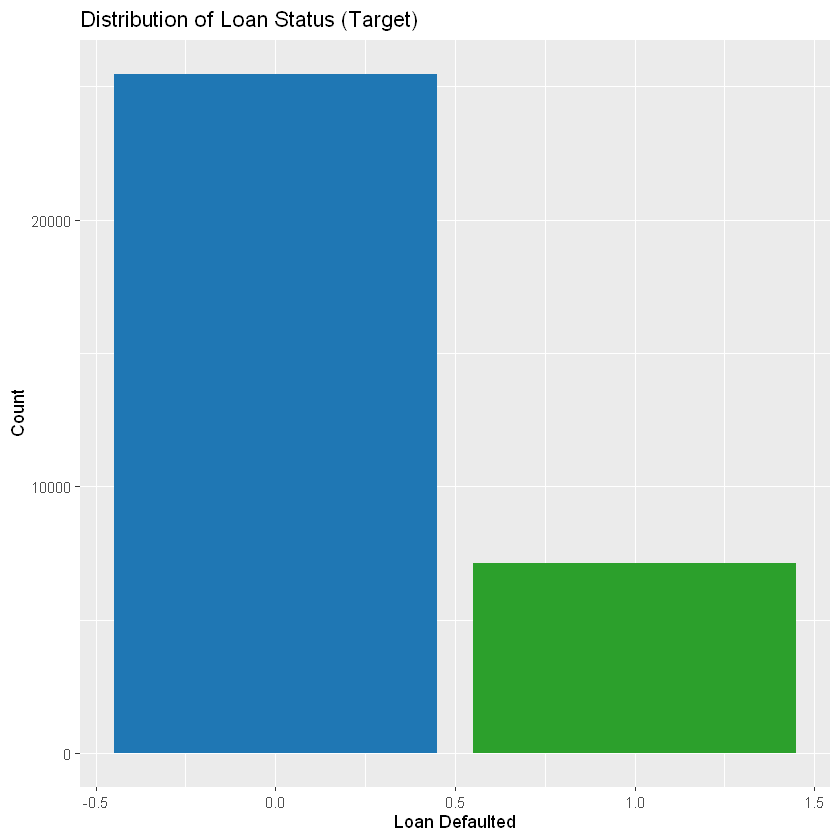

In [15]:
# Target Variable Distribution

ggplot(df, aes(x = loan_status)) + 
  geom_bar(fill = c("#1f77b4", "#2ca02c")) + 
  labs(title = "Distribution of Loan Status (Target)", 
       x = "Loan Defaulted", 
       y = "Count")

In [23]:
# Select numeric variables and reshape to long format
df_long <- df %>%
  select(where(is.numeric)) %>%
  pivot_longer(cols = everything(), names_to = "variable", values_to = "value")

Warning message:
"Removed 3116 rows containing non-finite outside the scale range (`stat_bin()`)."


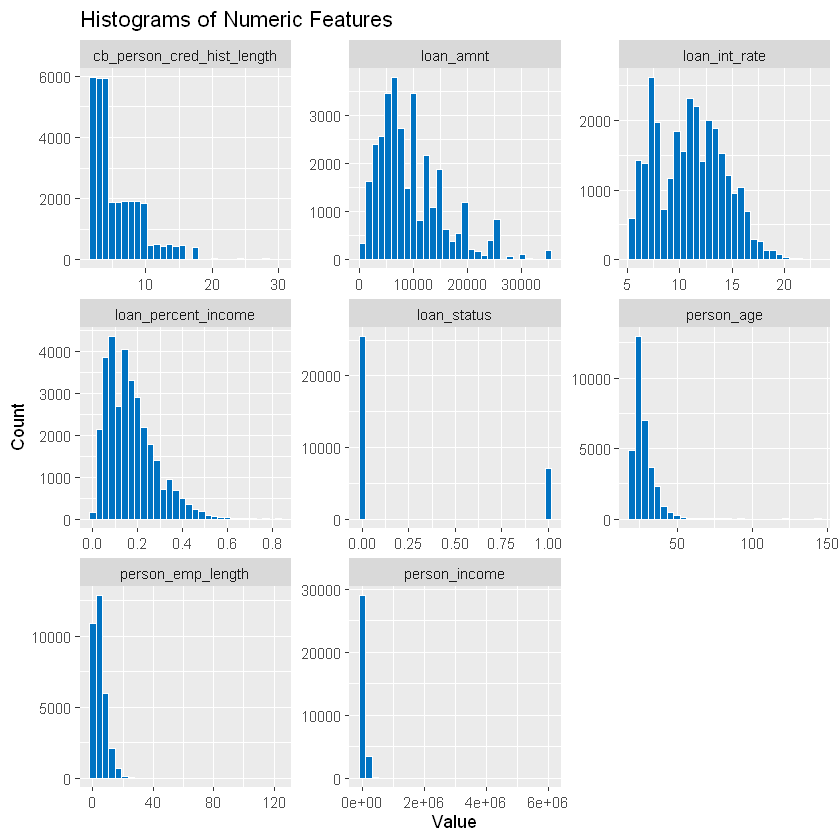

In [24]:
# Plot all histograms in one faceted plot
ggplot(df_long, aes(x = value)) +
  geom_histogram(fill = "#0073c2ff", color = "white", bins = 30) +
  facet_wrap(~ variable, scales = "free") +
  labs(title = "Histograms of Numeric Features", x = "Value", y = "Count")

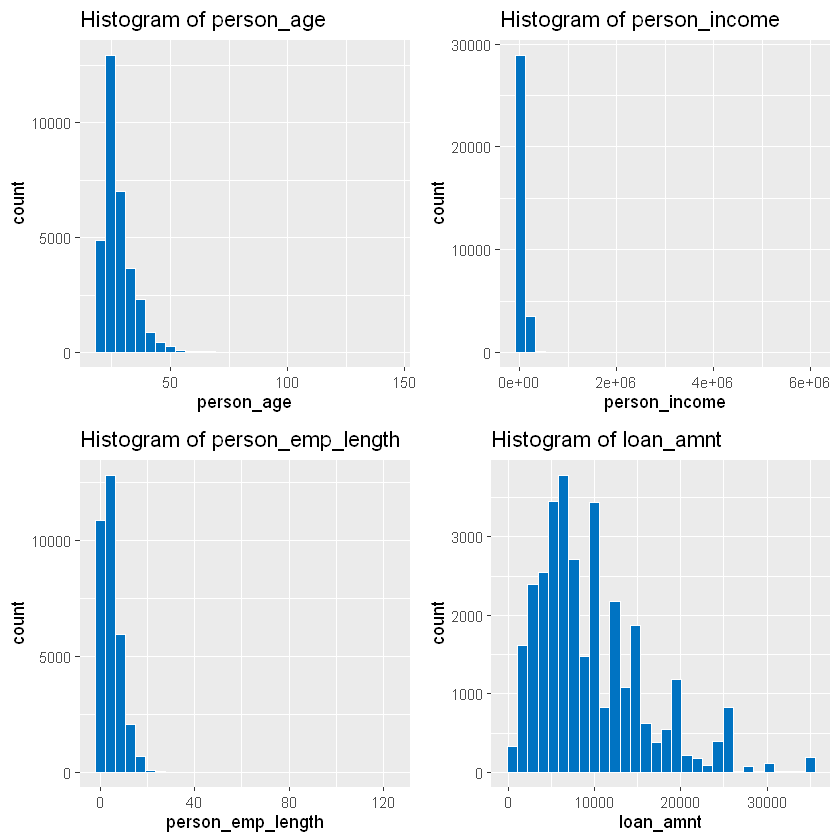

In [25]:
# Arrange plots in grid 

do.call(grid.arrange, c(numeric_plots[1:4], ncol = 2))

Warning message in geom_bar(postion = "fill"):
"Ignoring unknown parameters: `postion`"
Warning message:
"The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


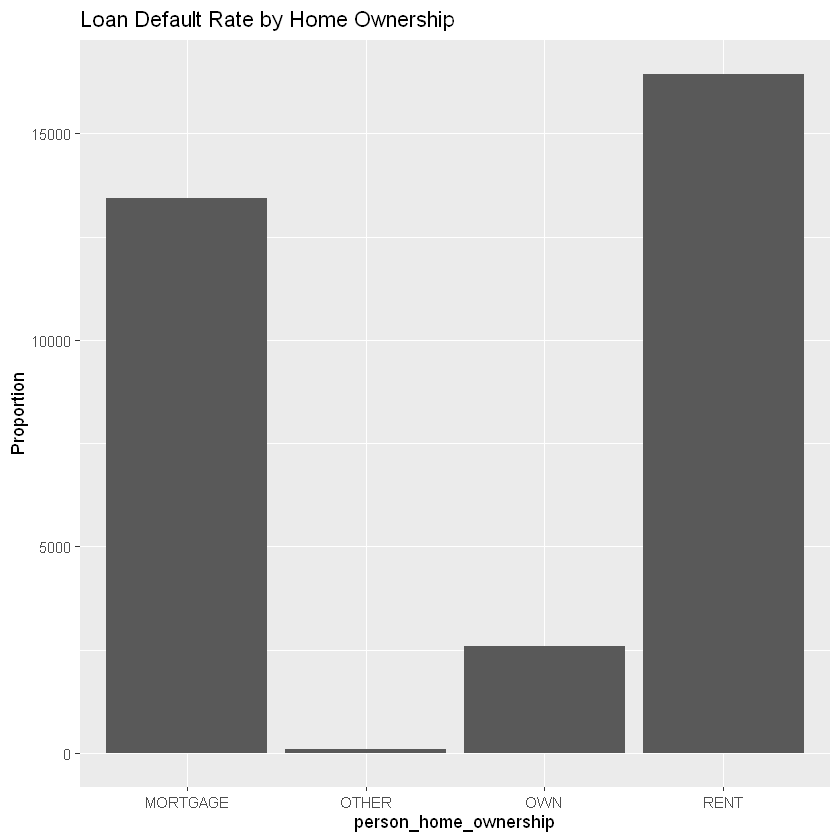

In [28]:
# Categorical Variables VS Target

ggplot(df, aes(x = person_home_ownership, fill = loan_status)) +
geom_bar(postion = "fill") +
labs(title = "Loan Default Rate by Home Ownership", y = "Proportion")

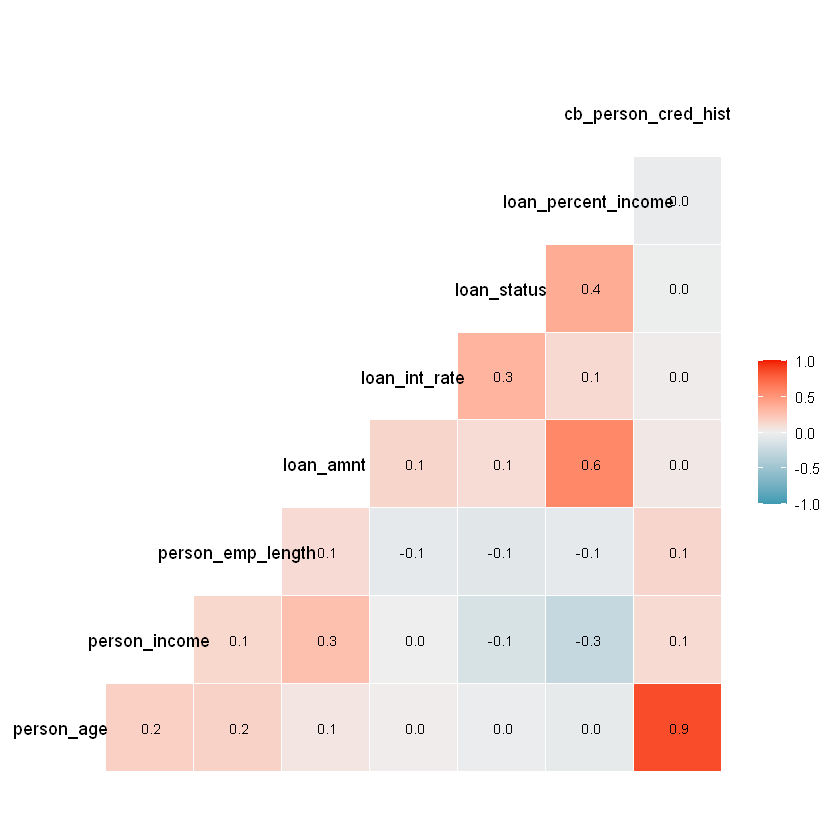

In [32]:
# Correlation Matrix

cor_matrix <- cor(numeric_vars)
ggcorr(numeric_vars, label = TRUE, label_size = 3)

Warning message:
"Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?"
Warning message:
"Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?"
Warning message:
"Removed 3116 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


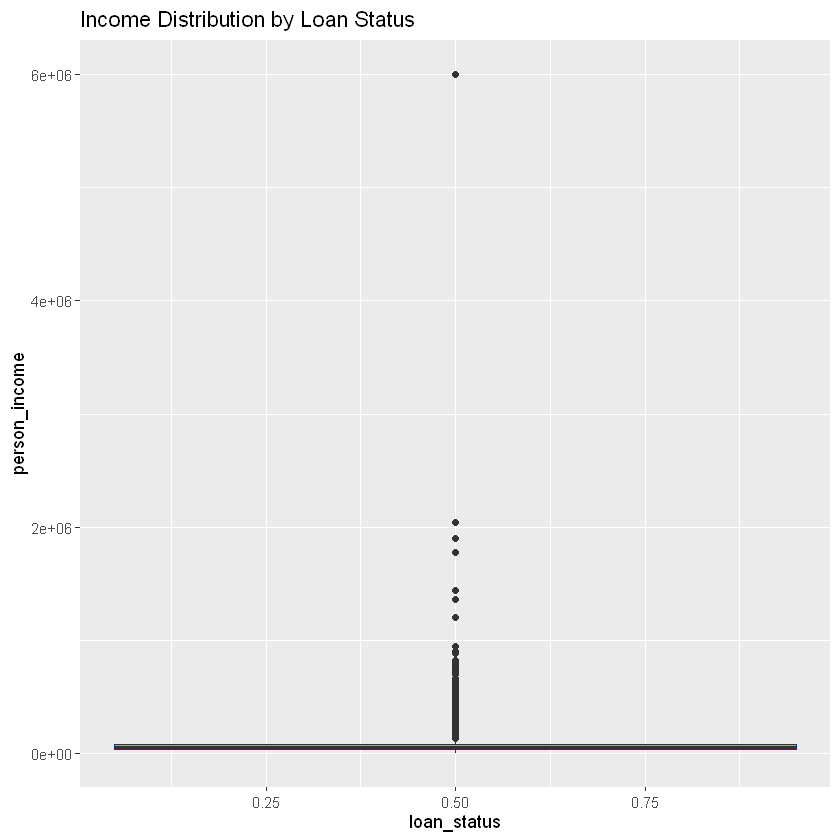

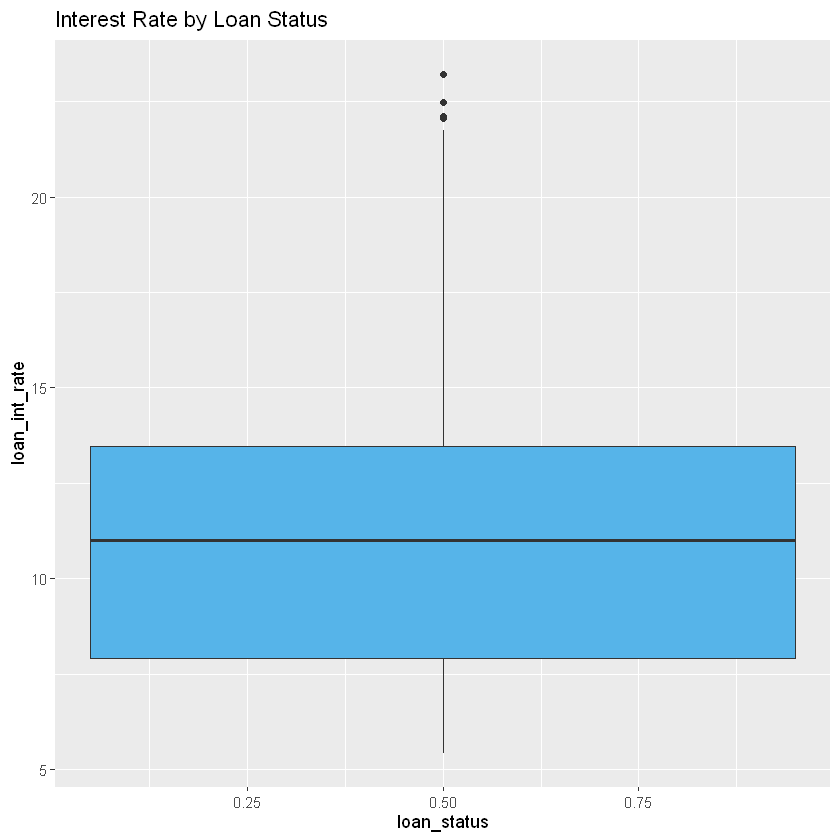

In [35]:
# Boxplots of Numeric VS Target

ggplot(df, aes(x = loan_status, y = person_income)) +
geom_boxplot(fill = "#e69f00") +
labs(title = "Income Distribution by Loan Status")

ggplot(df, aes(x = loan_status, y = loan_int_rate)) +
geom_boxplot(fill = "#56b4e9") +
labs(title = "Interest Rate by Loan Status")

Warning message:
"The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


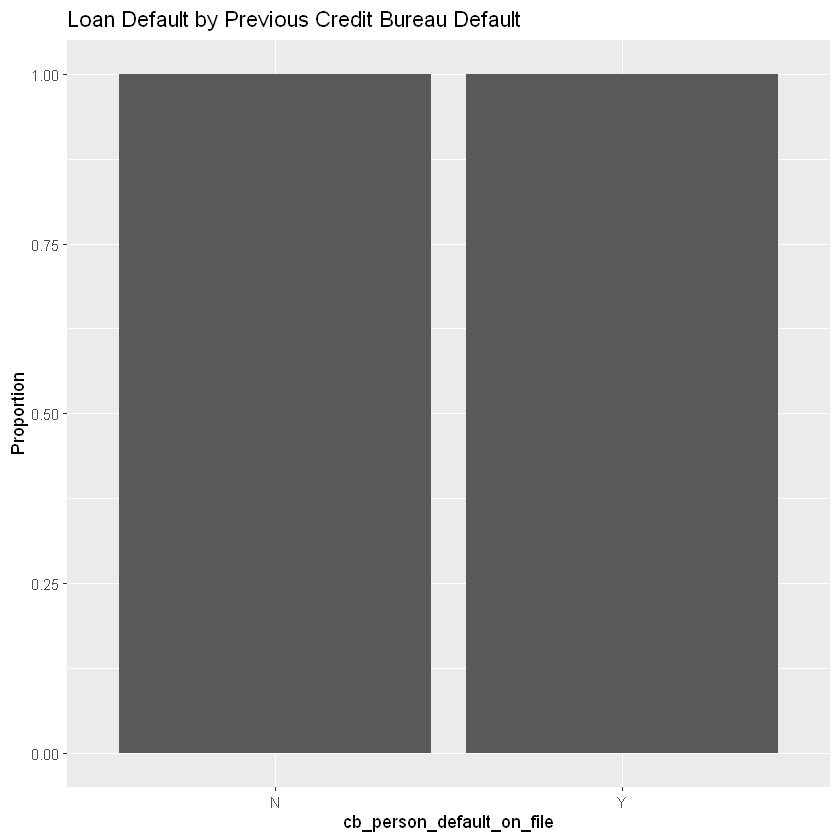

In [38]:
# Credit Bureau Default VS Loan Default

ggplot(df, aes(x = cb_person_default_on_file, fill = loan_status)) +
geom_bar(position = "fill") +
labs(title = "Loan Default by Previous Credit Bureau Default", y = "Proportion")

# Logistic Regression for Credit Risk Detection

In [5]:
library(ModelMetrics)
library(caret)
library(ROCR)
library(e1071)


Attaching package: 'ModelMetrics'


The following object is masked from 'package:base':

    kappa


Loading required package: lattice


Attaching package: 'caret'


The following objects are masked from 'package:ModelMetrics':

    confusionMatrix, precision, recall, sensitivity, specificity


The following object is masked from 'package:purrr':

    lift



Attaching package: 'e1071'


The following object is masked from 'package:ggplot2':

    element




In [6]:
  df <- read_csv("credit_risk_cleaned.csv")

Rows: 32581 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): person_home_ownership, loan_intent, loan_grade, cb_person_default_o...
dbl (8): person_age, person_income, person_emp_length, loan_amnt, loan_int_r...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
df$loan_status <- as.factor(df$loan_status)

In [10]:
# 1. Split Data into Train and Test Sets
set.seed(123)
train_index <- createDataPartition(df$loan_status, p = 0.7, list = FALSE)
train_data <- df[train_index, ]
test_data <- df[-train_index, ]

In [11]:
# 2. Build Logitic Regression Model

model <- glm(loan_status ~ ., data = train_data, family = "binomial")

In [13]:
# 3. Predict on Test Data

probabilities <- predict(model, newdata = test_data, type = "response")
predicted_classes <- ifelse(probabilities > 0.5, 1, 0)
predicted_classes <- as.factor(predicted_classes)
actual_classes <- test_data$loan_status

In [14]:
# 4. Model Evaluation

# Confusion Matrix
conf_mat <- confusionMatrix(predicted_classes, actual_classes, positive = "1")
print(conf_mat)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 6525  860
         1  355 1078
                                          
               Accuracy : 0.8622          
                 95% CI : (0.8548, 0.8693)
    No Information Rate : 0.7802          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5568          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5562          
            Specificity : 0.9484          
         Pos Pred Value : 0.7523          
         Neg Pred Value : 0.8835          
             Prevalence : 0.2198          
         Detection Rate : 0.1222          
   Detection Prevalence : 0.1625          
      Balanced Accuracy : 0.7523          
                                          
       'Positive' Class : 1               
                        

In [16]:
sum(is.na(probabilities))     # Count of NAs in predicted probabilities
sum(is.na(actual_classes))    # Count of NAs in actual class labels

[1] 955

[1] 0

In [17]:
# Combine into a data frame
df <- data.frame(prob = probabilities, actual = actual_classes)

In [18]:
# Remove rows with NA
df <- na.omit(df)

In [19]:
# Use filtered data
pred_obj <- prediction(df$prob, df$actual)
perf <- performance(pred_obj, "tpr", "fpr")   # Note: You had "trp" and "frp", should be "tpr", "fpr"
auc <- performance(pred_obj, "auc")@y.values[[1]]

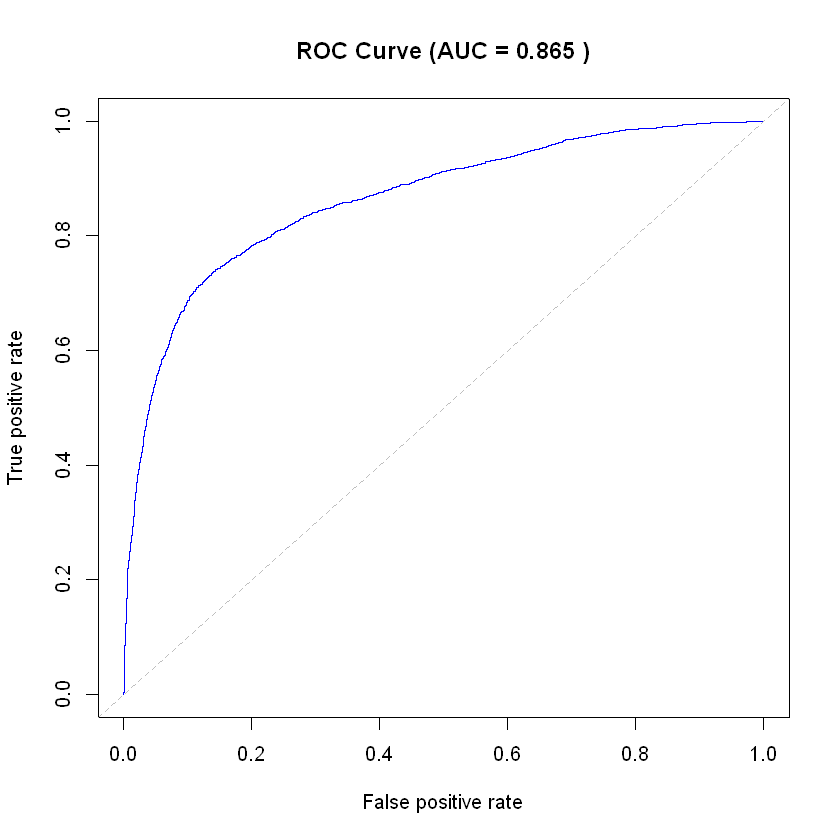

In [20]:
# Plot ROC
plot(perf, col = "blue", main = paste("ROC Curve (AUC =", round(auc, 3), ")")) 
abline(a = 0, b = 1, lty = 2, col = "gray")

In [21]:
summary(model)


Call:
glm(formula = loan_status ~ ., family = "binomial", data = train_data)

Coefficients: (1 not defined because of singularities)
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -4.116e+00  2.385e-01 -17.261  < 2e-16 ***
person_age                 -8.993e-03  7.288e-03  -1.234 0.217229    
person_income               1.906e-06  5.910e-07   3.225 0.001260 ** 
person_home_ownershipOTHER  3.116e-01  3.838e-01   0.812 0.416801    
person_home_ownershipOWN   -1.721e+00  1.253e-01 -13.734  < 2e-16 ***
person_home_ownershipRENT   8.177e-01  5.055e-02  16.176  < 2e-16 ***
person_emp_length          -2.042e-02  6.124e-03  -3.335 0.000854 ***
loan_intentEDUCATION       -8.905e-01  7.254e-02 -12.275  < 2e-16 ***
loan_intentHOMEIMPROVEMENT  7.168e-02  7.975e-02   0.899 0.368733    
loan_intentMEDICAL         -1.516e-01  6.807e-02  -2.227 0.025930 *  
loan_intentPERSONAL        -6.276e-01  7.333e-02  -8.559  < 2e-16 ***
loan_intentVENTURE        

In [22]:
#library(randomForest)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:gridExtra':

    combine


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




In [23]:
# Load cleaned dataset

df <- read_csv("credit_risk_cleaned.csv")

Rows: 32581 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): person_home_ownership, loan_intent, loan_grade, cb_person_default_o...
dbl (8): person_age, person_income, person_emp_length, loan_amnt, loan_int_r...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [24]:
# Ensure target is factor

df$loan_status <- as.factor(df$loan_status)

In [25]:
# 1. Split Data

set.seed(123)
train_index <-createDataPartition(df$loan_status, p = 0.7, list = FALSE)
train_data <- df[train_index, ]
test_data <- df[-train_index, ]

In [27]:
colSums(is.na(train_data))   # Number of NAs per column
sum(is.na(train_data))       # Total number of NAs

person_age              person_income 
                         0                          0 
     person_home_ownership          person_emp_length 
                         0                          0 
               loan_intent                 loan_grade 
                         0                          0 
                 loan_amnt              loan_int_rate 
                         0                       2161 
               loan_status        loan_percent_income 
                         0                          0 
 cb_person_default_on_file cb_person_cred_hist_length 
                         0                          0 
 cb_person_default_on_line 
                         0

[1] 2161

In [28]:
train_data <- na.omit(train_data)
rf_model <- randomForest(loan_status ~ ., data = train_data, ntree = 100, importance = TRUE)

In [29]:
# 3. Predict on Test Set

rf_probs <- predict(rf_model, test_data, type = "prob")[,2]
rf_preds <- predict(rf_model, test_data, type = "response")

In [30]:
# Confusion Matrix

confusionMatrix(rf_preds, test_data$loan_status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 6821  592
         1   59 1346
                                          
               Accuracy : 0.9262          
                 95% CI : (0.9205, 0.9315)
    No Information Rate : 0.7802          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7611          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.6945          
            Specificity : 0.9914          
         Pos Pred Value : 0.9580          
         Neg Pred Value : 0.9201          
             Prevalence : 0.2198          
         Detection Rate : 0.1526          
   Detection Prevalence : 0.1593          
      Balanced Accuracy : 0.8430          
                                          
       'Positive' Class : 1               
                        

In [32]:
sum(is.na(rf_probs))          # Are there NAs in predicted probabilities?
sum(is.na(test_data$loan_status))  # Any missing true labels?

[1] 955

[1] 0

In [33]:
# Predict probabilities
rf_probs <- predict(rf_model, newdata = test_data, type = "prob")[, 2]

In [34]:
# Combine into a data frame and remove NAs
roc_data <- data.frame(prob = rf_probs, actual = test_data$loan_status)
roc_data <- na.omit(roc_data)

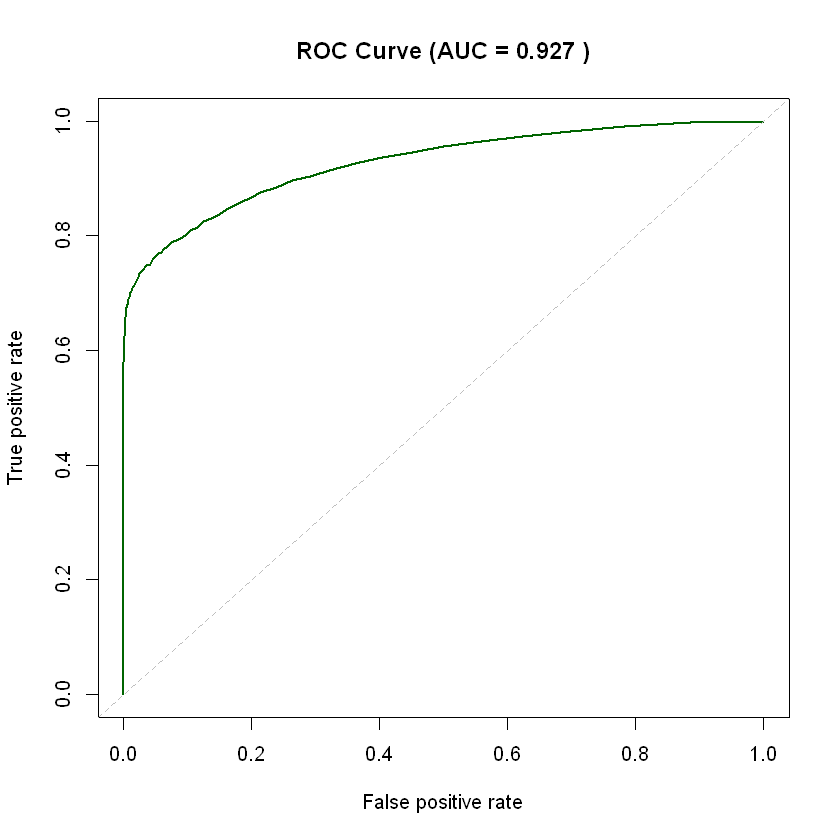

In [35]:
# ROC and AUC

rf_pred_obj <- prediction(roc_data$prob, roc_data$actual)
rf_perf <- performance(rf_pred_obj, "tpr", "fpr")
rf_auc <- performance(rf_pred_obj, "auc")@y.values[[1]]

plot(rf_perf, col = "darkgreen", lwd = 2,
     main = paste("ROC Curve (AUC =", round(rf_auc, 3), ")"))
abline(a = 0, b = 1, lty = 2, col = "gray")

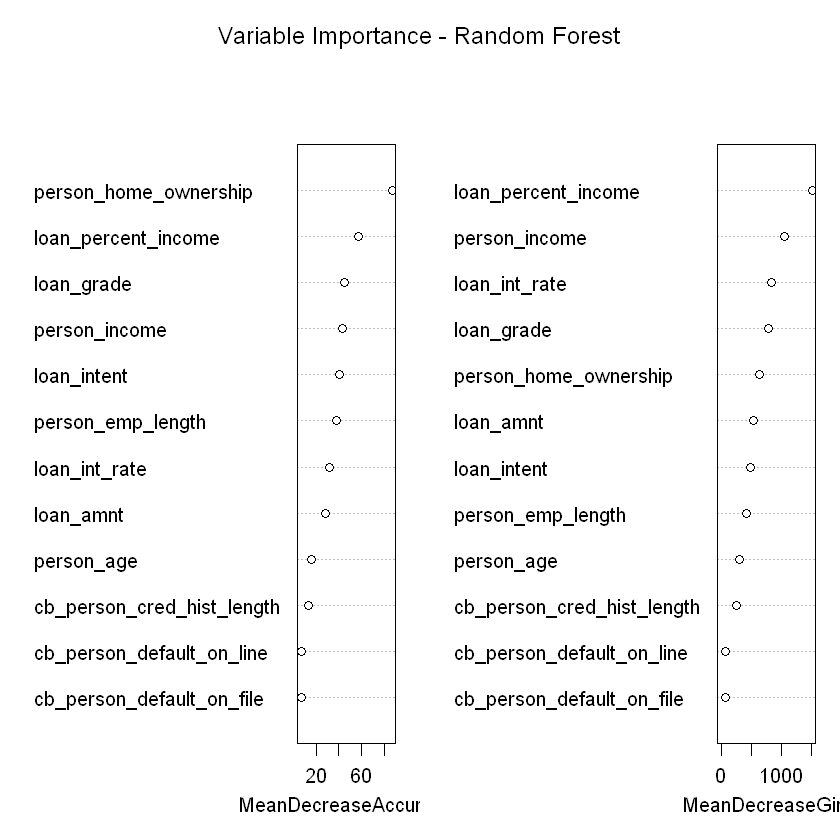

In [36]:
# 5. Feature Importance

varImpPlot(rf_model, main = "Variable Importance - Random Forest")